<a href="https://colab.research.google.com/github/scarecrow021/Beam_Selector_Stress_Deformation/blob/main/Beam_Selector_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Input Form** 

In [158]:
caseNumber = 8 #@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '-99'] {type:"raw"}
checkFor = "Deformation" #@param ["Stress", "Deformation", "Debug"]
force =  5000#@param {type:"number"}
torque = 0 #@param {type:"number"}
lengthOfBeam =  20#@param {type:"number"}
length_a = 0 #@param {type:"number"}
length_b =  5#@param {type:"number"}
length_c = 0 #@param {type:"number"}
length_L = 0 #@param {type:"number"}
youngsModulus = 203 #@param {type:"number"}
stressLimit =  150#@param {type:"number"}
deformationLimit =  20#@param {type:"number"}


# Back End

### Library Import

In [165]:
from google.colab import files
import urllib.request
import os
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFont, ImageDraw
import sys
import math


# automatically uploads beamLibrary.xlsx from github repo (cannot work without this)
if os.path.isfile('/content/beamLibrary.xlsx'):
    print("File Exists! Carry on....")
else:
    url = 'https://github.com/scarecrow021/Beam_Selector_Stress_Deformation/blob/main/beamLibrary.xlsx?raw=true'
    urllib.request.urlretrieve(url, '/content/beamLibrary.xlsx')
    print("File Uploaded!!")

# automatically uploads arial.ttffrom github repo (font file for result printing)
if os.path.isfile('/content/arial.ttf'):
    print("File Exists! Carry on....")
else:
    url = 'https://github.com/scarecrow021/Beam_Selector_Stress_Deformation/blob/main/arial.ttf?raw=true'
    urllib.request.urlretrieve(url, '/content/arial.ttf')
    print("File Uploaded!!")


File Exists! Carry on....
File Exists! Carry on....


### Function Definitions


#### Deformation Limit Functions

In [160]:
## Deformation Limit Functions Definitions

def deformation(Iy):
    if caseNumber == 1 :
        _deform = (1000*force*lengthOfBeam**3) / (48*Iy*youngsModulus*10**9)
    elif caseNumber == 2 :
        _deform = (1000*force*lengthOfBeam**3) / (3*Iy*youngsModulus*10**9)
    elif caseNumber == 3 :
        _deform = (1000*force*lengthOfBeam**3) / (192*Iy*youngsModulus*10**9)
    elif caseNumber == 4 :
        _deform = (1000*torque*lengthOfBeam**2) / (2*Iy*youngsModulus*10**9)
    elif caseNumber == 5 :
        _deform = (1000*torque*lengthOfBeam**2) / (8*Iy*youngsModulus*10**9)
    elif caseNumber == 6 :
        _deform = (1000*force*length_a*(3*lengthOfBeam**2 - 4*length_a**2)) / (24*Iy*youngsModulus*10**9)
    elif caseNumber == 7 :
        _deform = (1000*force*length_b*math.sqrt((lengthOfBeam**2 - length_b**2)**3)) / (9*math.sqrt(3)*lengthOfBeam*Iy*youngsModulus*10**9)
    elif caseNumber == 8 :
        _deform = (1000*force*(lengthOfBeam - length_b)**2 * (3*lengthOfBeam - (lengthOfBeam - length_b))) / (6*Iy*youngsModulus*10**9)
    elif caseNumber == 9 :
        _deform = (1000*2*force*length_b**3 * (lengthOfBeam-length_b)**2) / (3*Iy*(youngsModulus*10**9)*(lengthOfBeam + 2*length_b)**2)
    elif caseNumber == 10 :
        _deform = (1000*torque*lengthOfBeam**2) / (9*math.sqrt(3)*Iy*youngsModulus*10**9)
    elif caseNumber == 11 :
        _deform = (1000*force*lengthOfBeam**4) / (8*Iy*youngsModulus*10**9)
    elif caseNumber == 12 :
        _deform = 0
    elif caseNumber == 13 :
        _deform = 0
    elif caseNumber == 14 :
        _deform = 0
    elif caseNumber == 15 :
        _deform = 0
    else:
        _deform = -1
    return _deform


def deformLooper(beamLib, IyColNum, _result, _yes = False):
    for h in range(0,len(beamLib.index)):
        Iy = beamLib.iat[h,IyColNum]/(100**4)
        deform = deformation(Iy)
        if deform < deformationLimit:
            if not _yes:
                _result.append(beamLib.columns[0] + " " + str(beamLib.iat[h,1]) + " ...  Deformation: " + str(round(deform,2)) + " mm.")
            else:
                _result.append(beamLib.columns[0] + " " + str(beamLib.iat[h,0]) + " ...  Deformation: " + str(round(deform,2)) + " mm.")
            break


def case_deform():
    _result = []
    text1 = "You selected Case " + str(caseNumber) + " Deformation Limit"
    _result = [text1, "The minimum required beam and the deformation are: "] # Result String Array
    for libNum in range(0,15):
        beamLib = pd.read_excel('/content/beamLibrary.xlsx', libNum)
        if libNum in [8,13,14]:
            deformLooper(beamLib, 5, _result, True)
        elif libNum == 12:
            deformLooper(beamLib, 4, _result, True)   
        elif libNum in [7,9,10,11]:
            deformLooper(beamLib, 3, _result, True)
        elif libNum in range(0,7):
            deformLooper(beamLib, 6, _result)
    return _result


#### Stress Limit Functions

In [161]:
## Stress Limit Functions Definitions

def bendingMoment():
    if caseNumber == 1:
        M = force*lengthOfBeam/4
    elif caseNumber == 2:
        M = force*lengthOfBeam
    elif caseNumber == 3:
        M = force*lengthOfBeam/8
    elif caseNumber == 4:
        M = torque
    elif caseNumber == 5:
        M = torque
    elif caseNumber == 6:
        M = force*length_a
    elif caseNumber == 7:
        M = force*(lengthOfBeam - length_b)*length_b/lengthOfBeam
    elif caseNumber == 8:
        M = force*(lengthOfBeam - length_b)
    elif caseNumber == 9:
        M = force*(lengthOfBeam - length_b)*length_b/(lengthOfBeam**2)
    elif caseNumber == 10:
        M = torque
    elif caseNumber == 11:
        M = (force*lengthOfBeam**2)/2
    elif caseNumber == 12:
        M = (force*lengthOfBeam**2)/8
    elif caseNumber == 13:
        M = force*length_a
    elif caseNumber == 14:
        M = force*length_a*length_b/(length_a + length_b)
    elif caseNumber == 15:
        M = (force*lengthOfBeam**2)/12
    return M


def findStress(M, h, I):                         # Be careful ymax is not h/2 here as in Excel. That is why it is divided by 2 in the formula.
    _stress = (M*(h/(2*1000)))/((I*10**-8)*10**6)
    return _stress


def stressLimitCheck(M, stressLimit, result, beamLib, Iy_columNum, _yes= False, hDim_columNum=1):
    for h in range(0,len(beamLib.index)):
                Stress = findStress(M, beamLib.iat[h,hDim_columNum], beamLib.iat[h,Iy_columNum])
                if Stress < stressLimit:
                    if not _yes:
                        result.append(beamLib.columns[0] + " " + str(beamLib.iat[h,1]) + " ...  Stress: " + str(round(Stress,2)) + " MPa.")
                    else:
                        result.append(beamLib.columns[0] + " " + str(beamLib.iat[h,0]) + " ...  Stress: " + str(round(Stress,2)) + " MPa.")
                    break


def stressLimitCheckLooper(result, stressLimit):
    M = bendingMoment()
    for libNum in range(0,15):
        beamLib = pd.read_excel('/content/beamLibrary.xlsx', libNum)
        if libNum in [8,13,14]:
            stressLimitCheck(M, stressLimit, result, beamLib, 5, True)
        elif libNum == 12:
            stressLimitCheck(M, stressLimit, result, beamLib, 4, True)
        elif libNum in [7,9,10,11]:
            stressLimitCheck(M, stressLimit, result, beamLib, 3, True)
        elif libNum in range(0,7):
            stressLimitCheck(M, stressLimit, result, beamLib, 6)
    return result


def case_stress():
    _result = []
    text1 = "You selected Case " + str(caseNumber) + " Stress Limit"
    _result = [text1, "The minimum required beam and the stress are: "] # Result String Array
    _result = stressLimitCheckLooper(_result, stressLimit)
    return _result

## Interface

In [162]:
def caseCaller():
    if caseNumber in range(1,16):
        if checkFor == "Stress":
            _result = case_stress()
        elif checkFor == "Deformation":
            _result = case_deform()
        else:
            _result = "INVALID"
    else:
        _result = "INVALID"
    return _result

In [163]:
## Calls Calculator
result = caseCaller()
## Result Beautification
# Empty White Picture Creation
whiteFrame = np.full((500, 500, 3), 255, dtype = np.uint8)
cv2.imwrite('/content/result.jpeg', whiteFrame)
# Result text insertion
title_text = "*************** RESULT *************** \n"
resultImage = Image.open("/content/result.jpeg")
for i in range(0,len(result)):
    title_text = title_text + result[i] + "\n"
font = ImageFont.truetype("/content/arial.ttf", 16)
image_editable = ImageDraw.Draw(resultImage)
image_editable.text((10,10), title_text, fill=(0, 0, 0), font = font)
resultImage.save("/content/result.jpeg")
# Re-read image with opencv
image = cv2.imread("/content/result.jpeg")

# **RESULT**

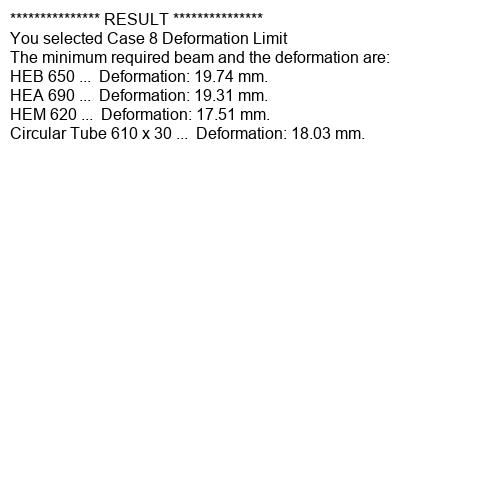

In [164]:
cv2_imshow(image)